In [1]:
import PIL as pil
import numpy as np
import matplotlib.pyplot as plt
import  photutils as ph
from astropy.stats import sigma_clipped_stats
from astropy.stats import sigma_clip

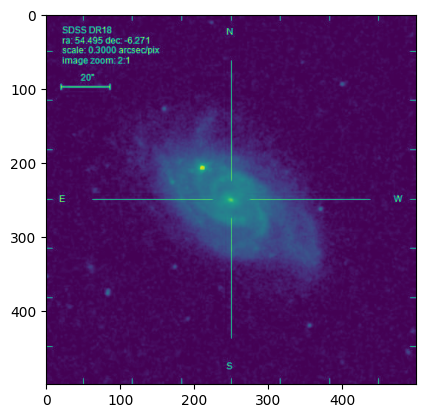

In [51]:
#Open image and convert it to numpy array
img=pil.Image.open("/home/kevin/aufklarung_astro_station/project2/images/image_54.495293ra_-6.2706183dec_GALAXY_520275740151801856specObjID_SDSS_dr18.jpg")
img_array=np.array(img)
img_array.shape
img_array=img_array[:,:,1]

plt.imshow(img_array)

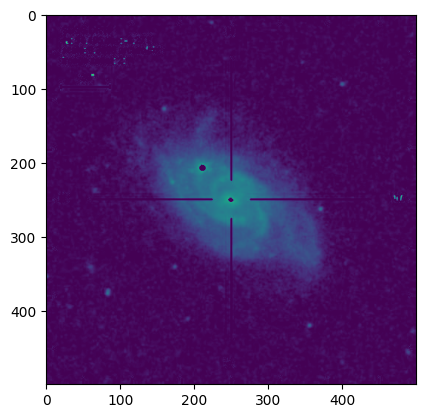

In [85]:
sigma_clip = SigmaClip(sigma=6, maxiters=5)
threshold = detect_threshold(img_array, nsigma=7, sigma_clip=sigma_clip)
segment_img = detect_sources(img_array, threshold, npixels=5)
footprint = circular_footprint(radius=1)

mask = segment_img.make_source_mask(footprint=footprint)
#mask = segment_img.data>0
clipped_data = np.where(mask, 0, img_array)
plt.imshow(clipped_data)
plt.show()